# AEBS
Demonstration of `AEJxLPS_2F` and `AEJxPBS_2F` product and the ground magnetic disturbances

In [5]:
from viresclient import SwarmRequest
from viresclient._wps.time_util import parse_datetime


SwarmRequest.COLLECTIONS.update({
    "AEJ_LPS": ["SW_OPER_AEJ{}LPS_2F".format(x) for x in "ABC"],
    "AEJ_PBS": ["SW_OPER_AEJ{}PBS_2F".format(x) for x in "ABC"],
    "AEJ_PBS:PGMFD": ["SW_OPER_AEJ{}PBS_2F:PGMFD".format(x) for x in "ABC"],
})

SwarmRequest.PRODUCT_VARIABLES.update({
    "AEJ_LPS": [
        "Latitude_QD", "Longitude_QD", "MLT_QD",
        "J_CF", "J_DF", "J_CF_SemiQD", "J_DF_SemiQD", "J_C"
    ],
    "AEJ_PBS": ["Latitude_QD", "Longitude_QD", "MLT_QD", "Flags", "PointType"],
    "AEJ_PBS:PGMFD": ["B_NEC"],
})

SPACECRAFT = "A"
TIME = "2015-06-02T00:00:00Z"
N_ORBIT = 10
try:
    request = SwarmRequest("https://staging.viresdisc.vires.services/ows")

    orbit_number = request.get_orbit_number(SPACECRAFT, parse_datetime(TIME))
    start_time, end_time =  request.get_times_for_orbits(SPACECRAFT, orbit_number, orbit_number + N_ORBIT)
    print("Orbit number: %s:%s" % (SPACECRAFT, orbit_number))
    print("Start time:  ", start_time)
    print("End time:    ", end_time)
    
    # retrieve latitude profiles
    request.set_collection("SW_OPER_AEJ%sLPS_2F" % SPACECRAFT)
    request.set_products(
        measurements=['Latitude_QD', 'Longitude_QD', 'MLT_QD', 'J_CF', 'J_DF', 'J_CF_SemiQD', 'J_DF_SemiQD', 'J_C'],
        auxiliaries=['QDOrbitDirection', 'OrbitNumber'],
        sampling_step="PT1S",       # 1 second sampling
    )
    response = request.get_between(
        start_time=start_time,
        end_time=end_time,
    )
    print("Sources:\n\t%s" % "\n\t".join(response.sources))
    profile = response.as_xarray()

    # retrieve peeks and boundaries
    request.set_collection("SW_OPER_AEJ%sPBS_2F" % SPACECRAFT)
    request.set_products(
        measurements=['PointType'],
        auxiliaries=['QDOrbitDirection', 'OrbitNumber'],
        sampling_step="PT1S",       # 1 second sampling
    )
    response = request.get_between(
        start_time=start_time,
        end_time=end_time,
    )
    print("Sources:\n\t%s" % "\n\t".join(response.sources))
    boundaries = response.as_xarray()

    
    # retrieve peeks and boundaries
    request.set_collection("SW_OPER_AEJ%sPBS_2F:PGMFD" % SPACECRAFT)
    request.set_products(
        measurements=['B_NEC'],
        auxiliaries=['QDOrbitDirection', 'OrbitNumber'],
        sampling_step="PT1S",       # 1 second sampling
    )
    response = request.get_between(
        start_time=start_time,
        end_time=end_time,
    )
    print("Sources:\n\t%s" % "\n\t".join(response.sources))
    pgmfd = response.as_xarray()

except Exception as error:
    print("ERROR: ", error)
else:
    print(profile)
    print(boundaries)
    print(pgmfd)

[1/1] Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ]

Orbit number: A:8528
Start time:   2015-06-01 23:46:18.406025
End time:     2015-06-02 16:56:51.940000


[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (2.962MB)


Sources:
	SW_OPER_AEJALPS_2F_20150601T000000_20150601T235959_0101
	SW_OPER_AEJALPS_2F_20150602T000000_20150602T235959_0101
	SW_OPER_AUXAORBCNT_20131122T000000_20200220T000000_0001
	SW_OPER_AUX_IMF_2__20150101T000000_20150630T230000_0001
	SW_OPER_MAGA_LR_1B_20150601T000000_20150601T235959_0505_MDR_MAG_LR
	SW_OPER_MAGA_LR_1B_20150602T000000_20150602T235959_0505_MDR_MAG_LR


[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.063MB)
[1/1] Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ]

Sources:
	SW_OPER_AEJAPBS_2F_20150101T000000_20151231T235959_0101
	SW_OPER_AUXAORBCNT_20131122T000000_20200220T000000_0001
	SW_OPER_AUX_IMF_2__20150101T000000_20150630T230000_0001
	SW_OPER_MAGA_LR_1B_20150602T000000_20150602T235959_0505_MDR_MAG_LR


[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.063MB)


Sources:
	SW_OPER_AEJAPBS_2F_20150101T000000_20151231T235959_0101:PGMFD
	SW_OPER_AUXAORBCNT_20131122T000000_20200220T000000_0001
	SW_OPER_AUX_IMF_2__20150101T000000_20150630T230000_0001
	SW_OPER_MAGA_LR_1B_20150602T000000_20150602T235959_0505_MDR_MAG_LR
<xarray.Dataset>
Dimensions:           (J_CF_dim1: 2, J_DF_dim1: 2, Timestamp: 26837)
Coordinates:
  * Timestamp         (Timestamp) datetime64[ns] 2015-06-01T23:59:42 ... 2015-06-02T16:40:38
Dimensions without coordinates: J_CF_dim1, J_DF_dim1
Data variables:
    Spacecraft        (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    J_C               (Timestamp) float64 -0.04176 -0.04176 ... 0.0001474
    J_DF_SemiQD       (Timestamp) float64 24.65 24.78 24.9 ... 3.18 3.175 3.17
    Latitude          (Timestamp) float64 52.97 53.03 53.09 ... -64.26 -64.2
    J_CF_SemiQD       (Timestamp) float64 12.76 12.5 12.23 ... -2.539 -2.535
    J_DF              (Timestamp, J_DF_dim1) float64 -4.901 24.16 ... 3.159
    Longitude_QD     

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


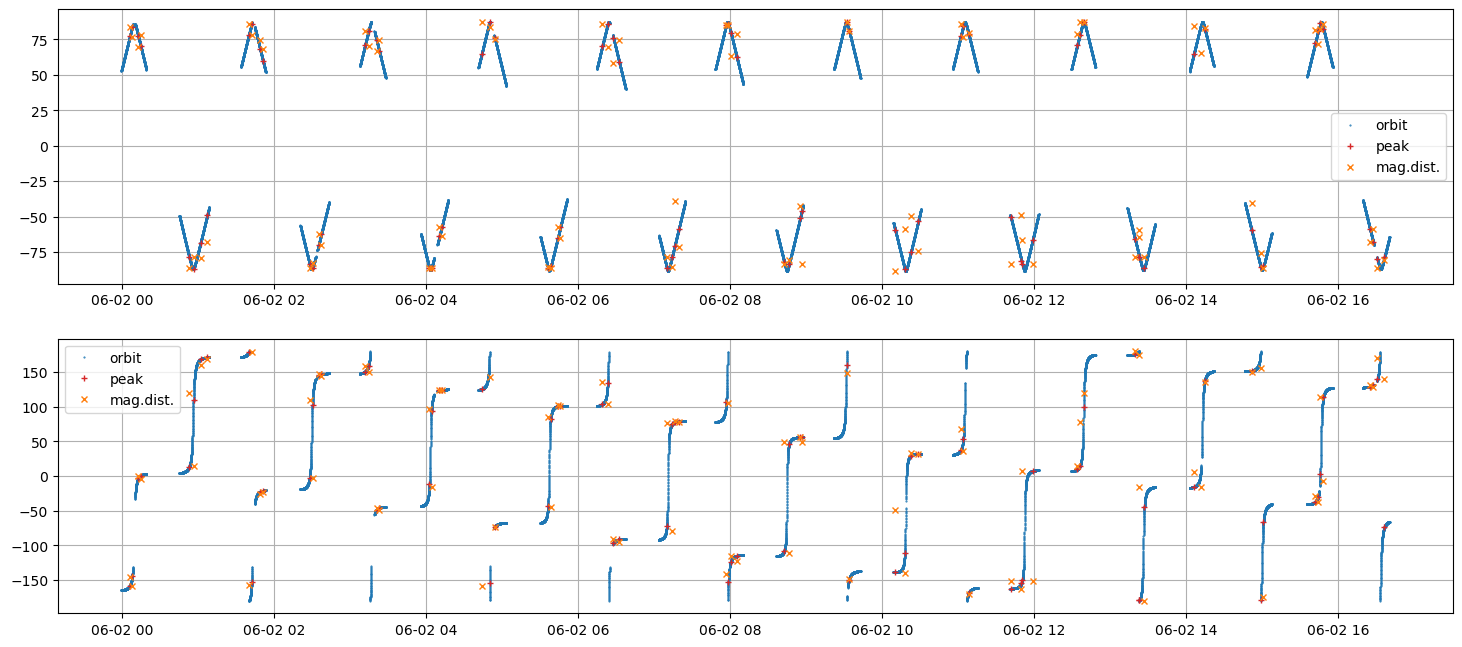

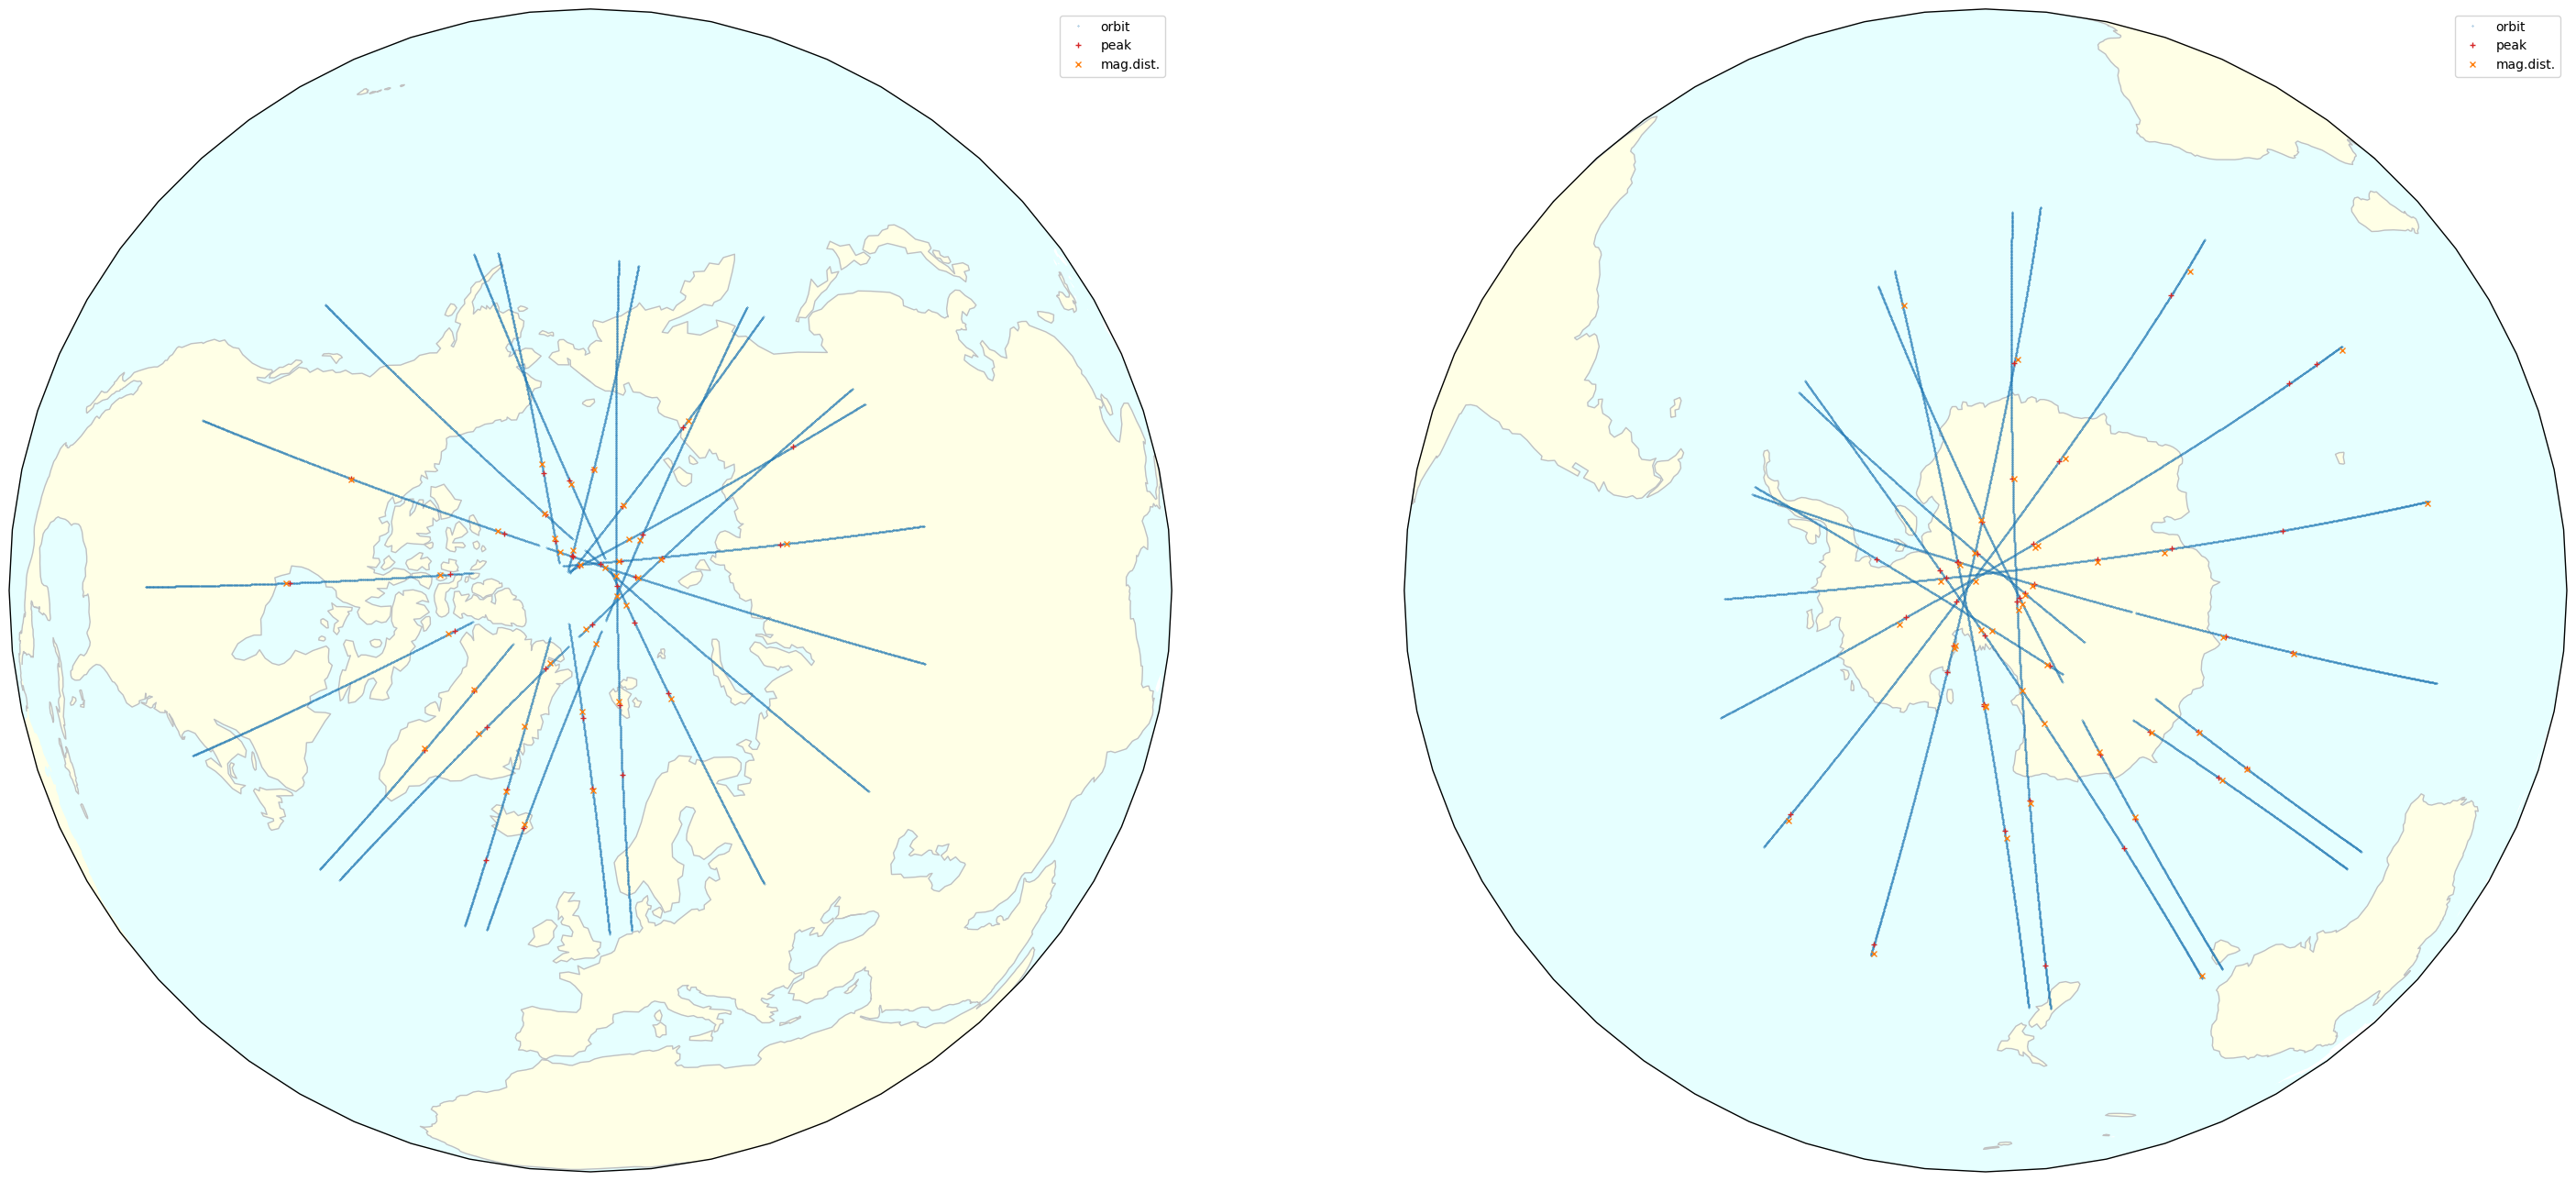

In [6]:
from numpy import isnan, logical_and, abs as aabs, cumsum, stack, pi
from matplotlib.pyplot import figure, subplot, show
from scipy.interpolate import interp1d
from cartopy.feature import LAND, OCEAN, COASTLINE
from cartopy.crs import Mollweide, Orthographic, PlateCarree
%matplotlib inline

# AOB data
time = profile['Timestamp'].values
lat = profile['Latitude'].values
lon = profile['Longitude'].values

time_g = pgmfd['Timestamp'].values
lat_g = pgmfd['Latitude'].values
lon_g = pgmfd['Longitude'].values

point_type = boundaries['PointType'].values
mask_peaks = point_type&0x6==0x4
time_b = boundaries['Timestamp'].values[mask_peaks]
lat_b = boundaries['Latitude'].values[mask_peaks]
lon_b = boundaries['Longitude'].values[mask_peaks]
point_type = point_type[mask_peaks]


fig = figure(figsize=(18, 8), dpi=100)
ax = subplot(2, 1, 1)
lp, = ax.plot(time, lat, '.', markersize=1, color='tab:blue')
lb, = ax.plot(time_b, lat_b, '+', markersize=4, color='tab:red')
lg, = ax.plot(time_g, lat_g, 'x', markersize=4, color='tab:orange')
ax.grid()
ax.legend((lp, lb, lg), ("orbit", "peak", "mag.dist."))

ax = subplot(2, 1, 2)
lp, = ax.plot(time, lon, '.', markersize=1, color='tab:blue')
lb, = ax.plot(time_b, lon_b, '+', markersize=4, color='tab:red')
lg, = ax.plot(time_g, lon_g, 'x', markersize=4, color='tab:orange')
ax.grid()
ax.legend((lp, lb, lg), ("orbit", "peak", "mag.dist."))


def plot_maps(ax):
    gl = ax.gridlines(crs=PlateCarree(), draw_labels=False, linewidth=0, color='silver', alpha=0.5, linestyle='--')
    ax.add_feature(LAND, facecolor=(1.0, 1.0, 0.9))
    ax.add_feature(OCEAN, facecolor=(0.9, 1.0, 1.0))
    ax.add_feature(COASTLINE, edgecolor='silver')
    lp, = ax.plot(lon, lat, '.', markersize=0.5, color='tab:blue', transform=PlateCarree())
    lb, = ax.plot(lon_b, lat_b, '+', markersize=4, color='tab:red', transform=PlateCarree())
    lg, = ax.plot(lon_g, lat_g, 'x', markersize=4, color='tab:orange', transform=PlateCarree())
    ax.legend((lp, lb, lg), ("orbit", "peak", "mag.dist."))

#fig = figure(figsize=(18, 9), dpi=100)
fig = figure(figsize=(36, 18), dpi=100)
plot_maps(subplot(1, 2, 1, projection=Orthographic(0, 90)))
plot_maps(subplot(1, 2, 2, projection=Orthographic(0, -90)))